# Kaggle Playground Prediction Competion
### What's Cooking?
Use recipe ingredients to categorize the cuisine

**Objective -** Predict the category of a dish's cuisine given a list of its ingredients. 

In [3]:
#Loading libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

**Loading Train Dataset**

In [4]:
train_df = pd.read_json('/content/drive/MyDrive/WhatsCooking/train.json')
train_df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


**Loading Test Dataset**

In [5]:
test_df = pd.read_json('/content/drive/MyDrive/WhatsCooking/test.json')
test_df.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [ ]:
#Checking the dimension of train dataframe
train_df.shape

(39774, 3)

In [ ]:
#Inspecting train dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [ ]:
#Checking the dimension of test dataframe
test_df.shape

(9944, 2)

In [ ]:
#Inspecting test dataframe
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9944 non-null   int64 
 1   ingredients  9944 non-null   object
dtypes: int64(1), object(1)
memory usage: 155.5+ KB


**Exploratory Data Analysis**

In [ ]:
#Checking for missing values in train dataframe
train_df.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

In [ ]:
#Checking for missing values in test dataframe
test_df.isnull().sum()

id             0
ingredients    0
dtype: int64

Count of Unique Cuisines

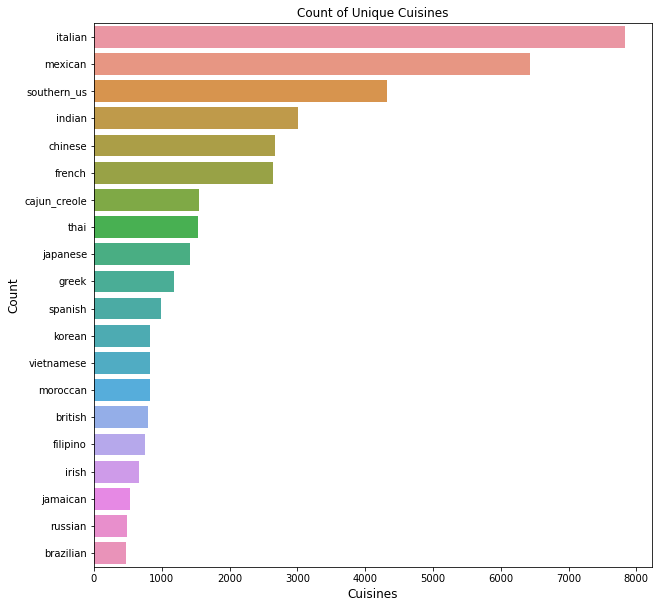

In [ ]:
#Finding count of unique cuisines in train dataframe
count_cuisine = train_df['cuisine'].value_counts(sort=True)
plt.figure(figsize=(10,10))
sns.barplot(y = count_cuisine.index, x = count_cuisine.values)
plt.title('Count of Unique Cuisines')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Cuisines', fontsize=12)
plt.show()

Count of Most Common Ingredients

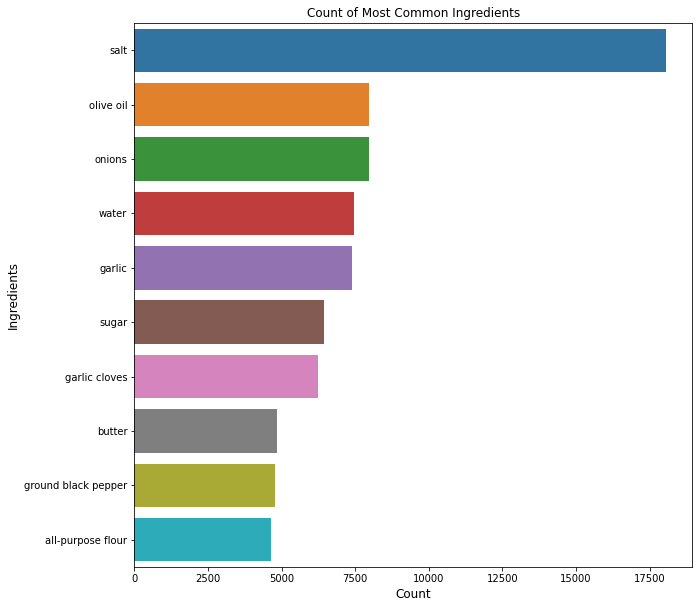

In [ ]:
#Finding count of most common ingredients in train dataframe
count_ingredients = []
for x in train_df['ingredients']:
    for y in x:
        count_ingredients.append(y)
count_ingredients = pd.Series(count_ingredients)
c_ingredients = count_ingredients.value_counts(sort=True).head(10)
plt.figure(figsize=(10,10))
sns.barplot(y = c_ingredients.index, x = c_ingredients.values)
plt.title('Count of Most Common Ingredients')
plt.ylabel('Ingredients', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

Top 20 Ingredients in All Cuisines

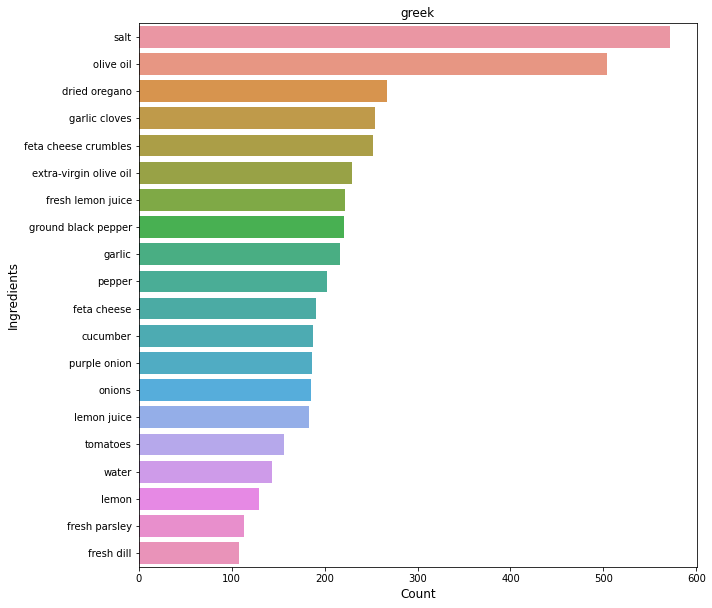

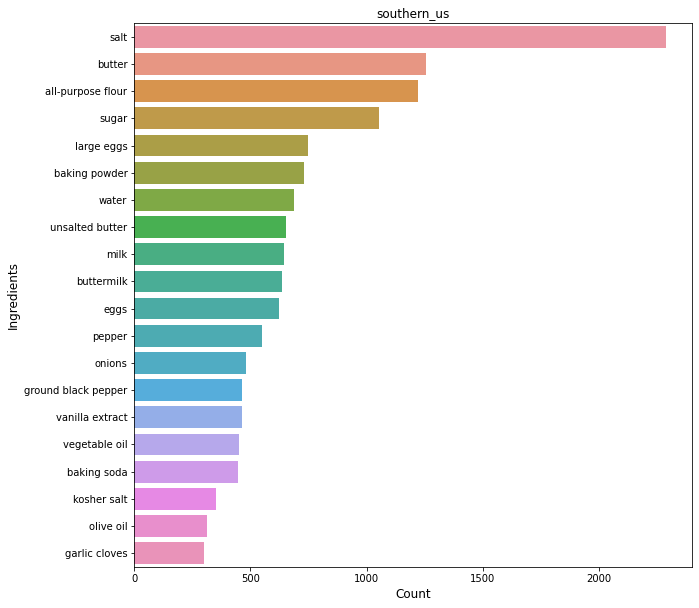

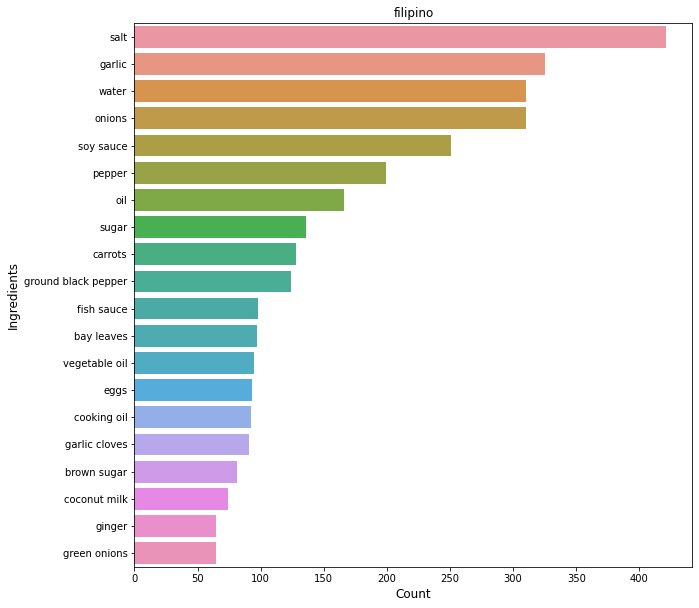

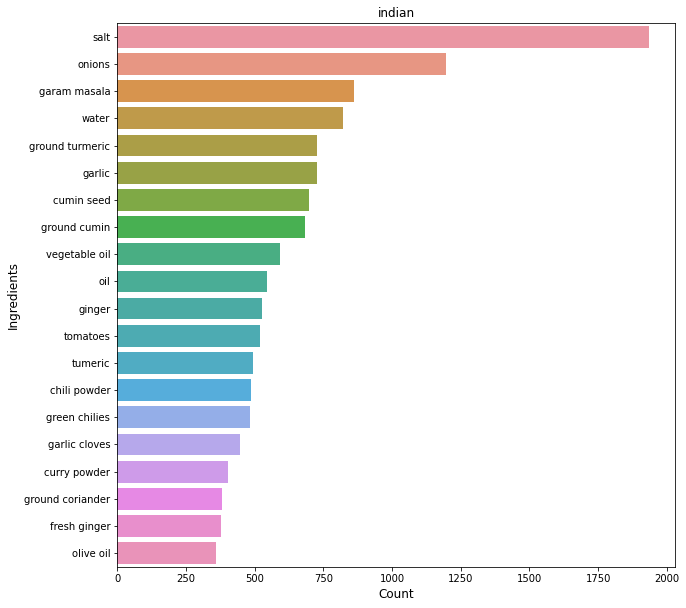

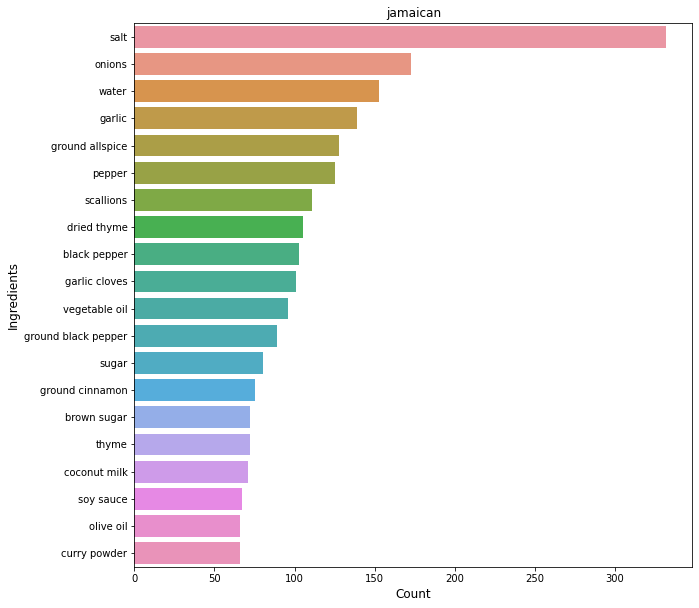

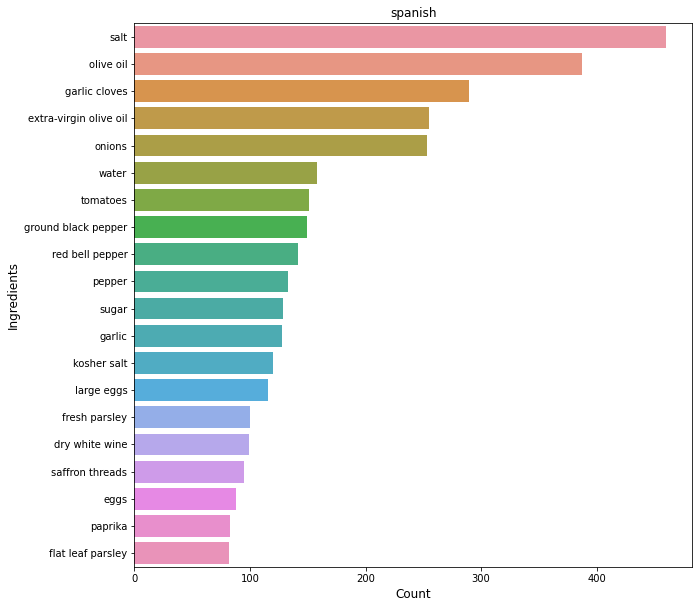

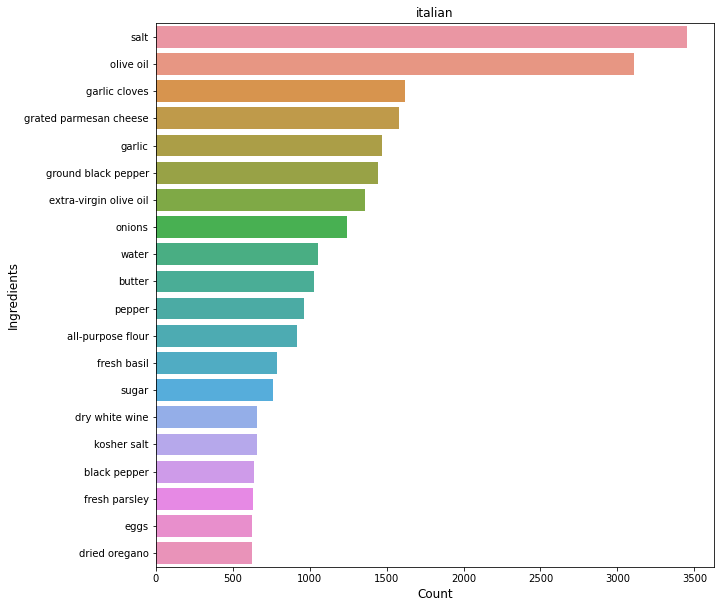

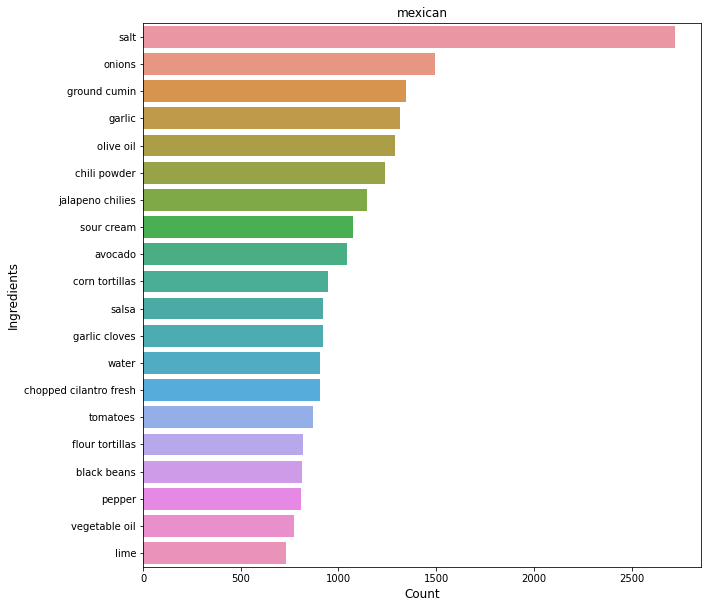

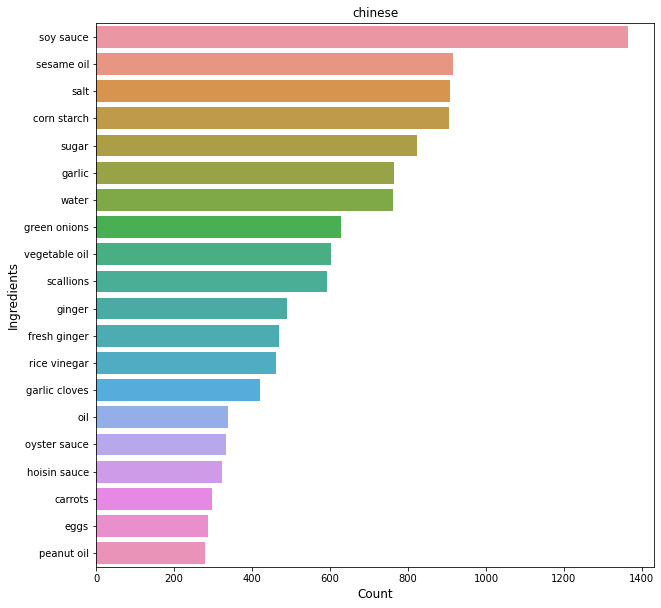

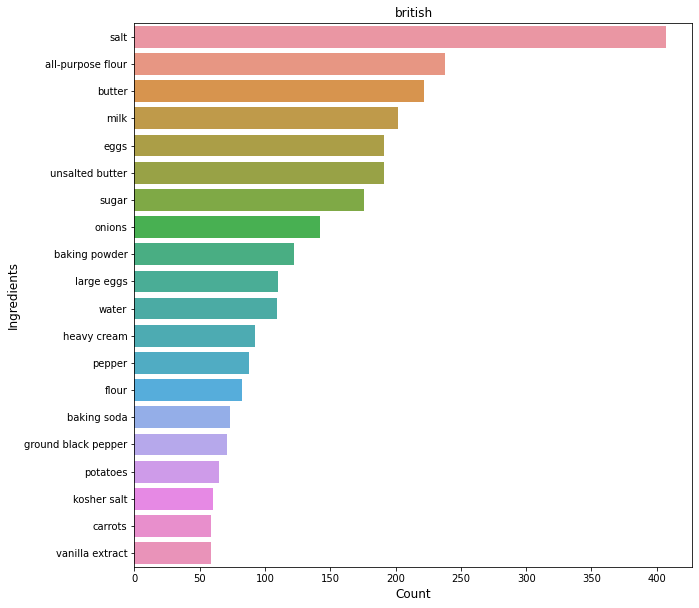

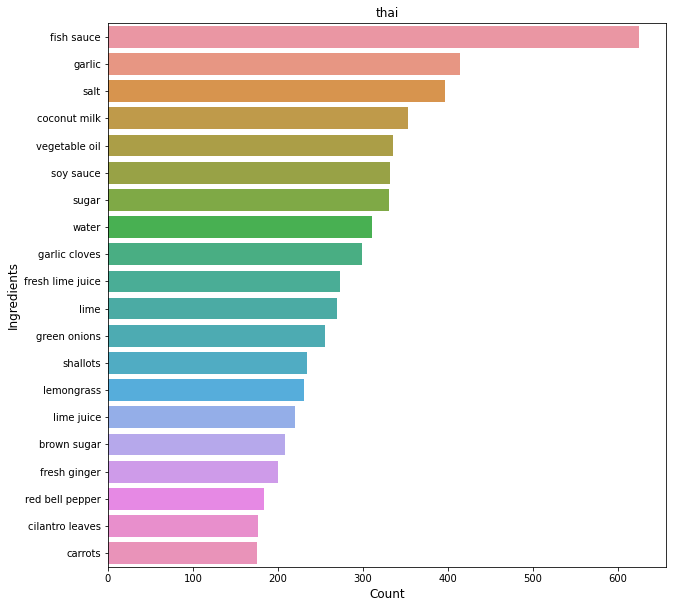

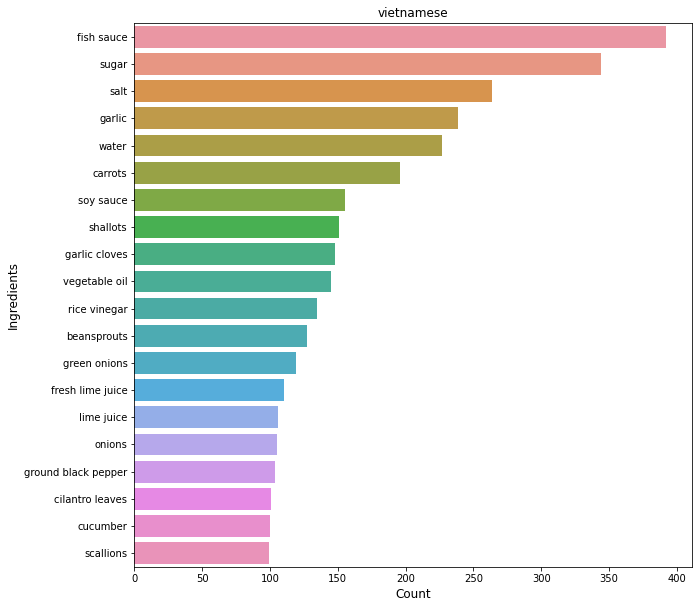

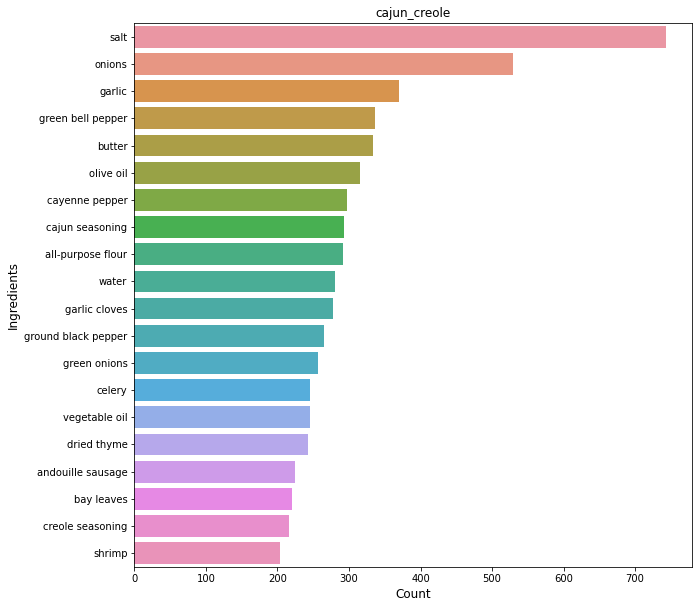

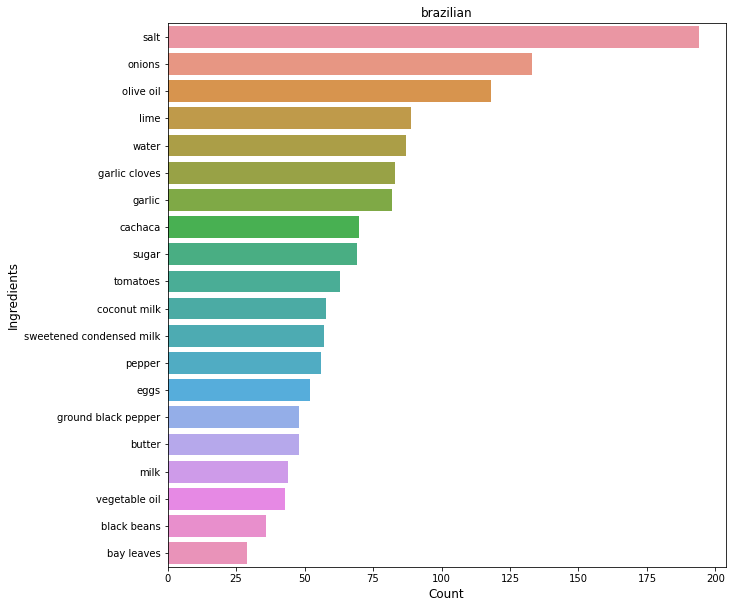

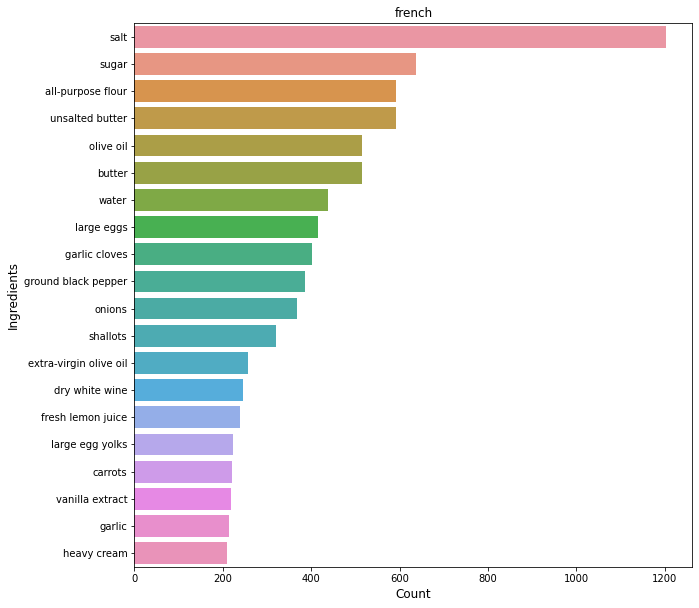

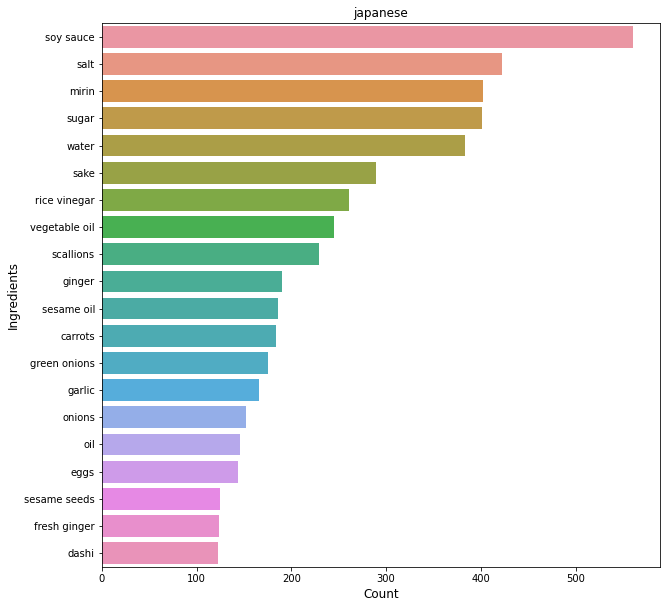

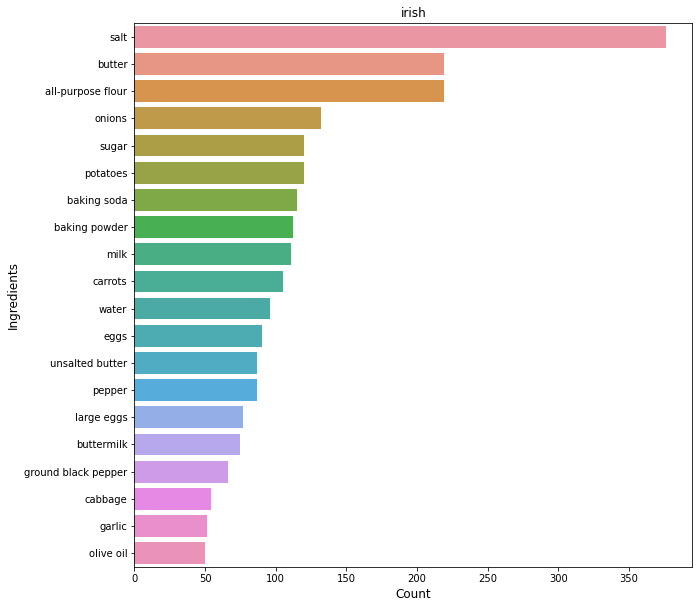

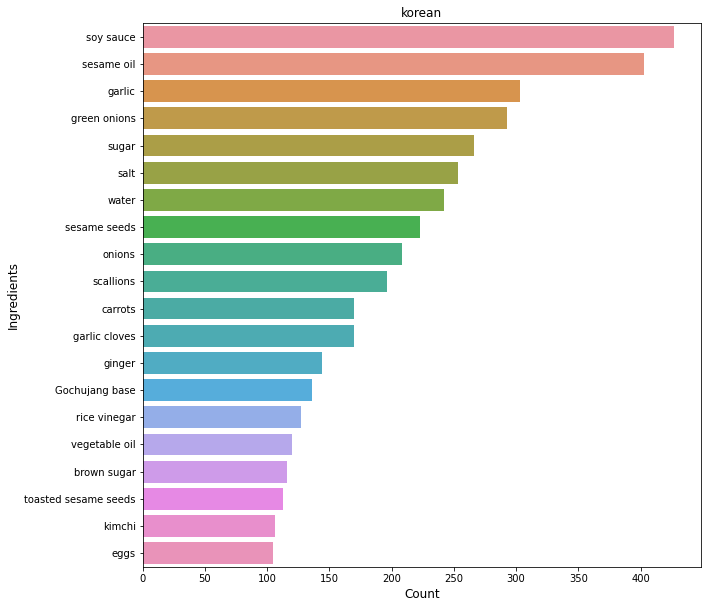

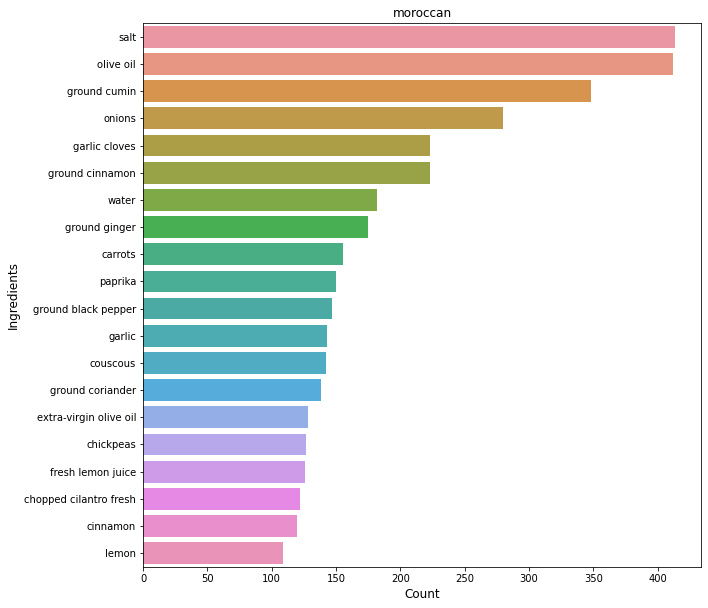

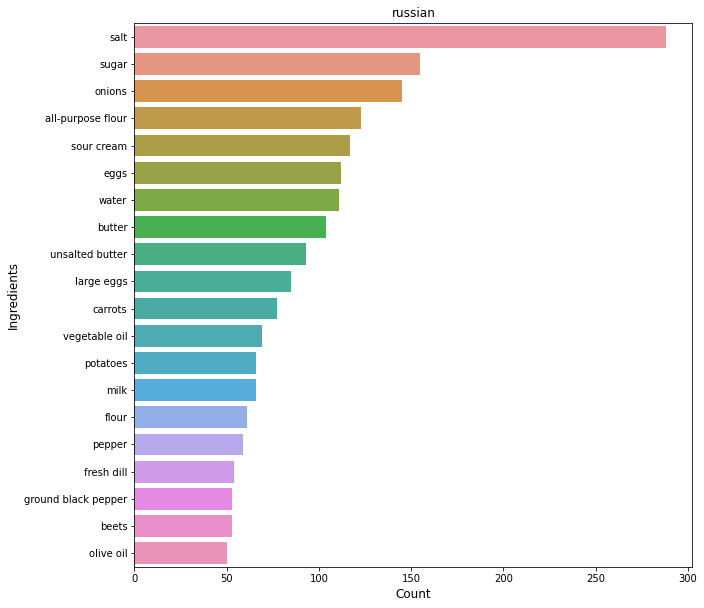

In [ ]:
#Top 20 ingredients in all cuisines
cuisines = train_df['cuisine'].unique()
for i in cuisines:
  ingredients=[]
  for j in train_df[train_df['cuisine']==i]['ingredients']:
    for k in j:
      ingredients.append(k)
  ingredients = pd.Series(ingredients)
  c_ingredients = ingredients.value_counts(sort=True).head(20)
  plt.figure(figsize=(10,10))
  sns.barplot(y = c_ingredients.index, x = c_ingredients.values)
  plt.title(i)
  plt.ylabel('Ingredients', fontsize=12)
  plt.xlabel('Count', fontsize=12)
  plt.show()

**Data Preprocessing**

In [6]:
#Converting to lowercase
def preprocess(ingredients):
  #Converting to lowercase
  ingredients = [[x.lower() for x in y] for y in ingredients]

  #Removing extra white spaces
  ingredients = [[re.sub( '\s+', ' ', x).strip() for x in y] for y in ingredients]

  #Removing numbers
  ingredients = [[re.sub("\d+", "", x) for x in y] for y in ingredients]

  #Removing punctuation and special characters
  ingredients = [[x.replace("-", " ") for x in y] for y in ingredients] 
  ingredients = [[x.replace("&", " ") for x in y] for y in ingredients] 
  ingredients = [[x.replace("'", " ") for x in y] for y in ingredients] 
  ingredients = [[x.replace("''", " ") for x in y] for y in ingredients] 
  ingredients = [[x.replace("%", " ") for x in y] for y in ingredients] 
  ingredients = [[x.replace("!", " ") for x in y] for y in ingredients] 
  ingredients = [[x.replace("(", " ") for x in y] for y in ingredients] 
  ingredients = [[x.replace(")", " ") for x in y] for y in ingredients] 
  ingredients = [[x.replace("/", " ") for x in y] for y in ingredients] 
  ingredients = [[x.replace("/", " ") for x in y] for y in ingredients] 
  ingredients = [[x.replace(",", " ") for x in y] for y in ingredients] 
  ingredients = [[x.replace(".", " ") for x in y] for y in ingredients] 
  ingredients = [[re.sub(r'[^\w\s]', '', x) for x in y] for y in ingredients]

  #Removing units of measurement
  units_list = ['g', 'lb', 's', 'n','oz']
  def remove_units(word):
    s = word.split()
    resw  = [word for word in s if word.lower() not in units_list]
        
    return ' '.join(resw)

  ingredients =  [[remove_units(x) for x in y] for y in ingredients]

  #Removing words which are not ingredients
  ingredients = [[re.sub(r'crushed|crumbles|ground|minced|powder|chopped|sliced', '', x) for x in y] for y in ingredients]

  return ingredients

In [7]:
#CLeaning ingredients column for both train and test dataframe
train_df["ingredients"] = preprocess(train_df["ingredients"])
test_df["ingredients"] = preprocess(test_df["ingredients"])

In [8]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [9]:
train_df['ingredients'] = [' '.join([WordNetLemmatizer().lemmatize(line) for line in lists]).strip() for lists in train_df['ingredients']]       
test_df['ingredients'] = [' '.join([WordNetLemmatizer().lemmatize(line) for line in lists]).strip() for lists in test_df['ingredients']]

In [ ]:
#Inspecting train dataframe after cleaning
train_df.head()

,id,cuisine,ingredients
0,10259,greek,romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,plain flour pepper salt tomato black pepper ...
2,20130,filipino,egg pepper salt mayonaise cooking oil green ch...
3,22213,indian,water vegetable oil wheat salt
4,13162,indian,black pepper shallot cornflour cayenne pepper ...


In [ ]:
#Inspecting test dataframe after cleaning
test_df.head()

,id,ingredients
0,18009,baking egg all purpose flour raisin milk whit...
1,28583,sugar egg yolks corn starch cream of tartar ba...
2,41580,sausage links fennel bulb frond olive oil cuba...
3,29752,meat cuts file smoked sausage okra shrimp and...
4,35687,black pepper salt sausage casings leek parmigi...


In [10]:
train = train_df['ingredients']
target = train_df['cuisine']
test = test_df['ingredients']

**TFIDF Vectorization**

In [11]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range = ( 1 , 1 ), analyzer="word", 
                        max_df = .57 , binary=False , token_pattern=r'\w+' , sublinear_tf=False)
train = tfidf.fit_transform(train)
test = tfidf.transform(test)

**Model Development**

Artificial Neural Network

In [14]:
#Loading libraries for ANN sequential model
from keras.models import Sequential
from keras.layers import Dense

In [29]:
#Building a model
ann = Sequential()
ann.add(Dense(32, activation='relu'))
ann.add(Dense(30, activation='relu'))
ann.add(Dense(23, activation='softmax'))

In [36]:
#Compiling the model
import tensorflow as tf
import keras
ann.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [31]:
#Converting string class labels to integers using label encoder to work with ann model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df["target_coded"] = le.fit_transform(train_df["cuisine"])
train_df.head()
target_ann=train_df["target_coded"]

In [ ]:
#Converting train csr matrix of tfidf to array to work with ann model
train = train.toarray()

In [37]:
#Fitting the model on train data
ann.fit(train,target_ann,batch_size=32,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1243/1243 [==============================] - 5s 3ms/step - loss: 1.4569 - accuracy: 0.5845
Epoch 2/100
1243/1243 [==============================] - 4s 3ms/step - loss: 0.8919 - accuracy: 0.7338
Epoch 3/100
1243/1243 [==============================] - 4s 3ms/step - loss: 0.7926 - accuracy: 0.7657
Epoch 4/100
1243/1243 [==============================] - 4s 3ms/step - loss: 0.7393 - accuracy: 0.7824
Epoch 5/100
1243/1243 [==============================] - 4s 3ms/step - loss: 0.7017 - accuracy: 0.7917
Epoch 6/100
1243/1243 [==============================] - 4s 3ms/step - loss: 0.6748 - accuracy: 0.8008
Epoch 7/100
1243/1243 [==============================] - 4s 3ms/step - loss: 0.6548 - accuracy: 0.8063
Epoch 8/100
1243/1243 [==============================] - 4s 3ms/step - loss: 0.6382 - accuracy: 0.8105
Epoch 9/100
1243/1243 [==============================] - 4s 3ms/step - loss: 0.6251 - accuracy: 0.8151
Epoch 10/100
1243/1243 [==============================] - 4s 3ms/step - loss: 0.6125 

In [39]:
#Predictions on test data
test=test.toarray()
predictions=ann.predict(test)

In [44]:
#Converting predictions to classes
classes = predictions.argmax(axis=-1)

In [46]:
#Converting encoded labels back to original target labels
pred_ann = le.inverse_transform(classes)

In [53]:
pred_ann

array(['british', 'southern_us', 'chinese', ..., 'italian', 'southern_us',
       'mexican'], dtype=object)

In [51]:
#Adding cuisine column to test dataframe with predicted target values
test_df["cuisine"] = pred_ann.tolist()

In [52]:
test_df

,id,ingredients,cuisine
0,18009,baking egg all purpose flour raisin milk whit...,british
1,28583,sugar egg yolks corn starch cream of tartar ba...,southern_us
2,41580,sausage links fennel bulb frond olive oil cuba...,chinese
3,29752,meat cuts file smoked sausage okra shrimp and...,cajun_creole
4,35687,black pepper salt sausage casings leek parmigi...,italian
...,...,...,...
9939,30246,large egg yolks fresh lemon juice sugar bourbo...,french
9940,36028,hot sauce butter sweet potatoes adobo sauce salt,southern_us
9941,22339,black pepper salt parmigiano reggiano cheese r...,italian
9942,42525,cheddar cheese cayenne paprika plum tomatoes g...,southern_us


In [57]:
#Creating the final submission CSV file
submission = test_df.drop('ingredients', axis=1)
submission.to_csv('/content/drive/MyDrive/WhatsCooking/submission.csv', index=False)